Перед началом выполнения, сделайте копию этого colab'а. Чтобы сделать копию нужно в пункте меню Файл выбрать "Сохранить копию на диске"

# Задание 1

---

Напишите функцию linan(), которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.


Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
# enter you code
import numpy as np

def linan(str1, str2):
  str1 = str1.split()
  str2 = str2.split()
  str1 = list(map(float, str1))
  str2 = list(map(float, str2))
  k1 = np.array([[str1[0], str1[1]], [str2[0], str2[1]]])
  k2 = np.array([str1[2], str2[2]])
  try:
    res = np.linalg.solve(k1, k2)
    print(res)
  except:
    print("Error") # система не имеет решений

linan("1 2 3", "4 5 6")



Error


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый результат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



Обратите внимание, что ожидается массив numpy

In [ ]:
# enter you code

import numpy as np

def decorate_matrix(n):
    if n < 1:
        print("Error")
        return 0
    arr = np.ones((n, n))
    arr[1:-1, 1:-1] = 0
    print(arr)

decorate_matrix(10)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример.
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
# enter you code

from scipy import optimize


def f(x, a, b):
    return (x + a) ** 2 - b


def g(x, a, b):
    return abs(f(x, a, b))

def minimized(a, b):
    solution1 = optimize.minimize_scalar(f, args=(a,b))
    solution2 = optimize.minimize_scalar(g, args=(a,b))
    print(round(solution1.x, 4), " ", round(solution2.x, 4))


a = 3
b = 4
minimized(a, b)


-3.0   -1.0


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

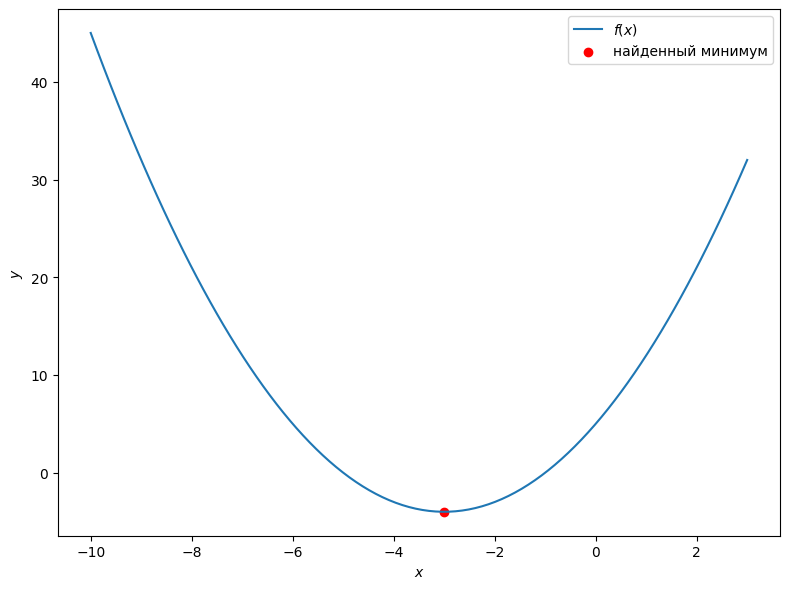

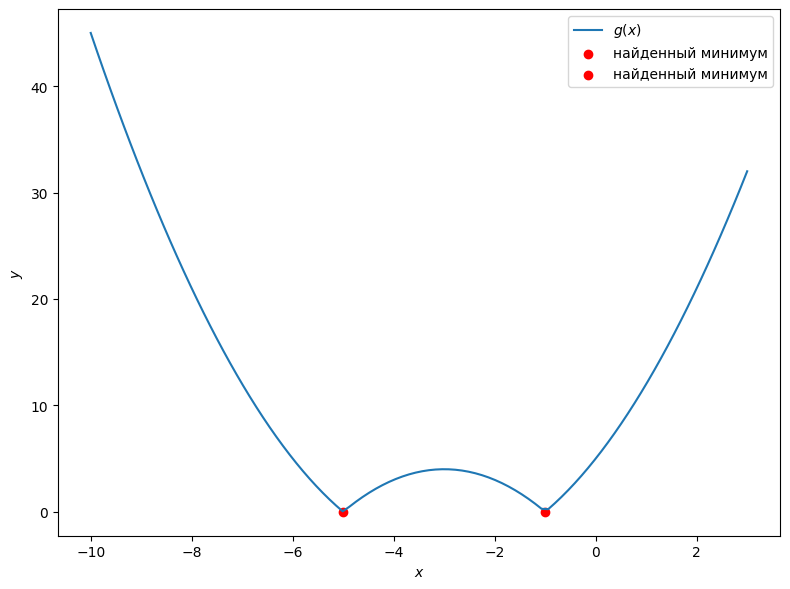

In [ ]:
# enter you code

import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt


def f(x, a, b):
    return (x + a) ** 2 - b


def g(x, a, b):
    return abs(f(x, a, b))

def minimized(a, b):
    solution1 = optimize.minimize_scalar(f, args=(a,b))
    solution2 = optimize.minimize_scalar(g, args=(a,b), bounds=(-6, -4))
    solution3 = optimize.minimize_scalar(g, args=(a,b), bounds=(-4, 10))



    x = np.linspace(-10, 3, 100)
    fig, ax = plt.subplots(figsize=(8, 6), layout="tight")
    ax.plot(x, f(x, a, b), label=r"$f(x)$")
    ax.scatter(solution1.x, solution1.fun, color="red", label="найденный минимум")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.legend()

    fig, ax = plt.subplots(figsize=(8, 6), layout="tight")
    ax.plot(x, g(x, a, b), label=r"$g(x)$")
    ax.scatter(solution2.x, solution2.fun, color="red", label="найденный минимум")
    ax.scatter(solution3.x, solution3.fun, color="red", label="найденный минимум")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.legend()


a = 3
b = 4
minimized(a, b)


# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
import numpy as np

p = 0.5

# Вероятность того, что ни у одного человека не выпало 10 раз подряд
no_p_in_10 = (1 - p**9)**1000

# Вероятность того, что ни у одного человека не выпало 8 раз подряд
no_p_in_8 = (1 - p**7)**1000

# Вероятность того, что ровно у троих человек выпало 10 раз подряд
p_3_in_10 = (np.math.comb(1000, 3)) * ((p**9)**3) * ((1 - p**9)**997)

print("Вероятность, что хотя бы у одного человека выпало 10 раз подряд:", 1 - no_p_in_10)
print("Вероятность, что хотя бы у одного человека выпало 8 раз подряд:", 1 - no_p_in_8)
print("Вероятность, что ровно у троих человек выпало 10 раз подряд:", p_3_in_10)

Вероятность, что хотя бы у одного человека выпало 10 раз подряд: 0.858440454732242
Вероятность, что хотя бы у одного человека выпало 8 раз подряд: 0.9996075798421896
Вероятность, что ровно у троих человек выпало 10 раз подряд: 0.1762873858121736
